# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | belgrade
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | staritsa
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | camayenne
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | korce
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | phuthaditjhaba
Processing Record 20 of Set 1 | cinisi
Processing Record 21 of Set 1 | goundam
Processing Reco

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,84.43,77,97,11.45,TK,1715121836
1,bilibino,68.0546,166.4372,29.43,86,95,2.55,RU,1715121803
2,margaret river,-33.9500,115.0667,58.01,72,57,10.92,AU,1715121781
3,richards bay,-28.7830,32.0377,69.13,74,0,10.87,ZA,1715121789
4,adamstown,-25.0660,-130.1015,71.31,78,61,9.31,PN,1715121786


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Weather/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("Output_Weather/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,84.43,77,97,11.45,TK,1715121836
1,bilibino,68.0546,166.4372,29.43,86,95,2.55,RU,1715121803
2,margaret river,-33.9500,115.0667,58.01,72,57,10.92,AU,1715121781
3,richards bay,-28.7830,32.0377,69.13,74,0,10.87,ZA,1715121789
4,adamstown,-25.0660,-130.1015,71.31,78,61,9.31,PN,1715121786


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

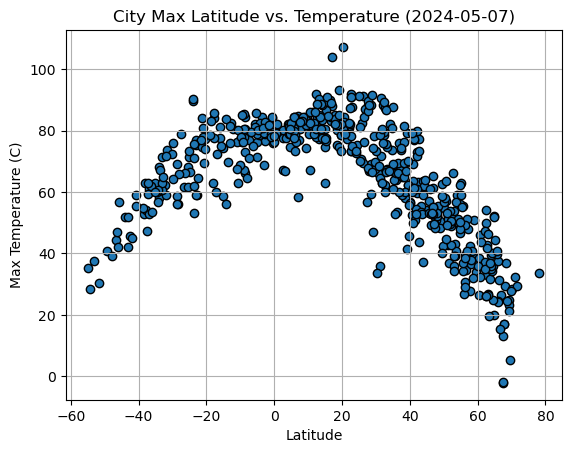

In [36]:
# Build scatter plot for latitude vs. temperature
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Max Latitude vs. Temperature ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("Output_Weather/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

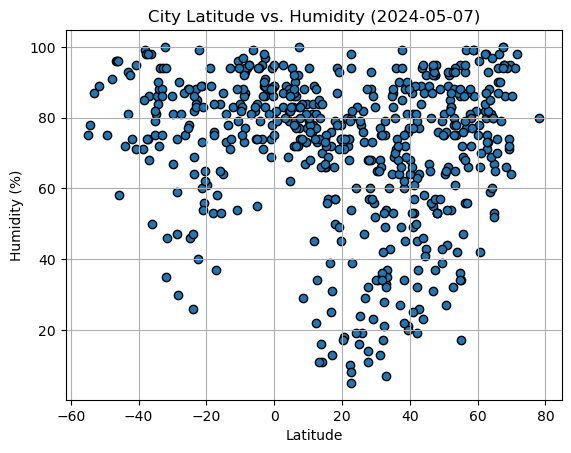

In [37]:
# Build scatter plot for latitude vs. temperature
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("Output_Weather/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

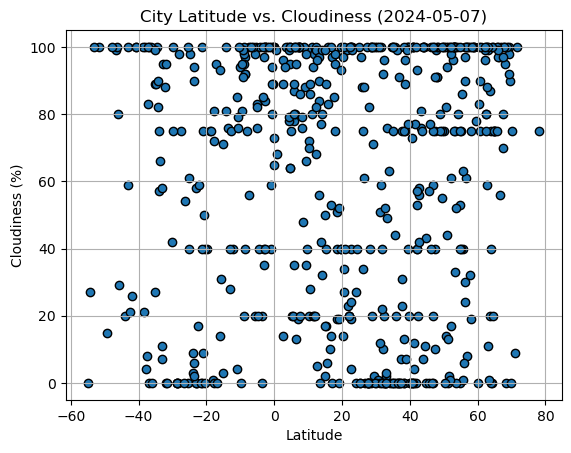

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("Output_Weather/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

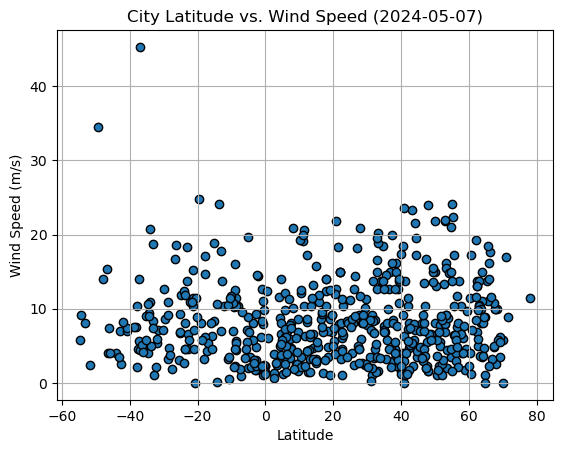

In [39]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("Output_Weather/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, x_label, y_label):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Creating equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the linear regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and r-squared value
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (min(x_values), min(y_values) + 10), fontsize=12, color="red")
    
    # Set labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the plot
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,29.43,86,95,2.55,RU,1715121803
6,belgrade,44.8040,20.4651,61.34,92,0,3.44,RS,1715121836
8,staritsa,56.5075,34.9354,34.57,77,61,7.58,RU,1715121836
11,utrik,11.2278,169.8474,81.81,76,100,19.19,MH,1715121837
13,camayenne,9.5350,-13.6878,84.29,84,40,6.91,GN,1715121837


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,84.43,77,97,11.45,TK,1715121836
2,margaret river,-33.9500,115.0667,58.01,72,57,10.92,AU,1715121781
3,richards bay,-28.7830,32.0377,69.13,74,0,10.87,ZA,1715121789
4,adamstown,-25.0660,-130.1015,71.31,78,61,9.31,PN,1715121786
5,waitangi,-43.9535,-176.5597,51.82,72,20,4.00,NZ,1715121784


###  Temperature vs. Latitude Linear Regression Plot

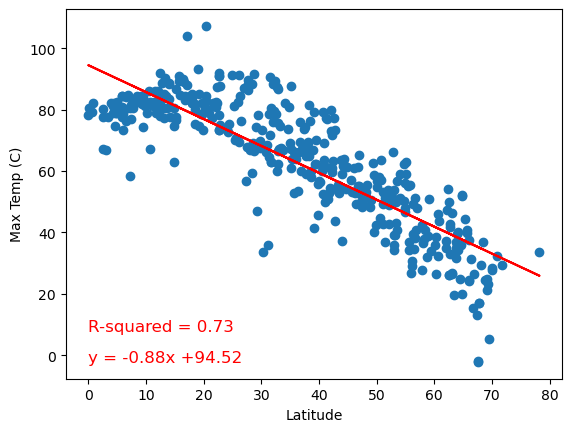

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plots(x_values, y_values, 'Latitude', 'Max Temp (C)')


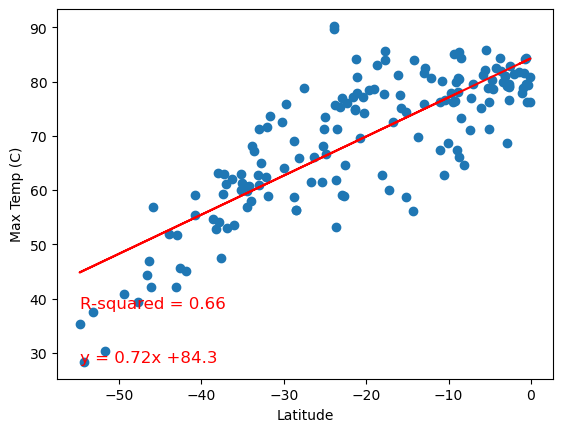

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plots(x_values, y_values, 'Latitude', 'Max Temp (C)')

**Discussion about the linear relationship:** In the northern hemisphere there is an moderate negative relationship between max temperature and latitude: as the latitude increases the max temperatures decreases, as indicated by the negative slope of the regression line. The opposite is true for the southern hemisphere, as there is a (slightly less strong) positive relationship between max temperature and latitude. This makes sense when you think about it geographically; the closer you get to the Equator, the warmer temperatures will be.

### Humidity vs. Latitude Linear Regression Plot

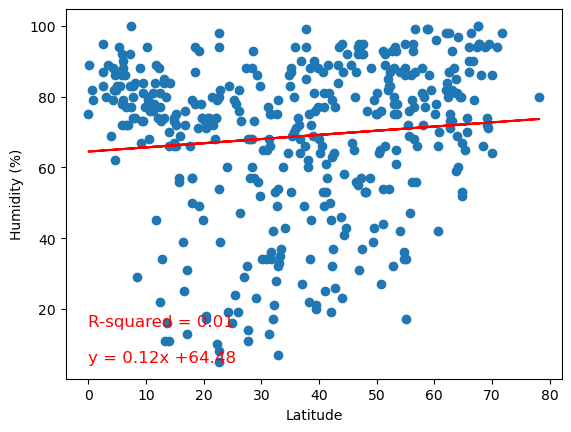

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plots(x_values, y_values, 'Latitude', 'Humidity (%)')

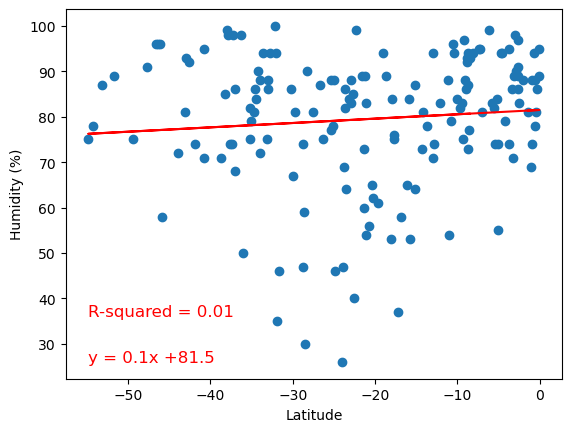

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plots(x_values, y_values, 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** Unlike temperature, there does not appear to be any significant relationship between humidity and latitude in either the northern or southern hemispheres. Visually, is a very weak positive relationship between humidity and latitude northern hemisphere, but it doesn't carry any statistical weight. 

### Cloudiness vs. Latitude Linear Regression Plot

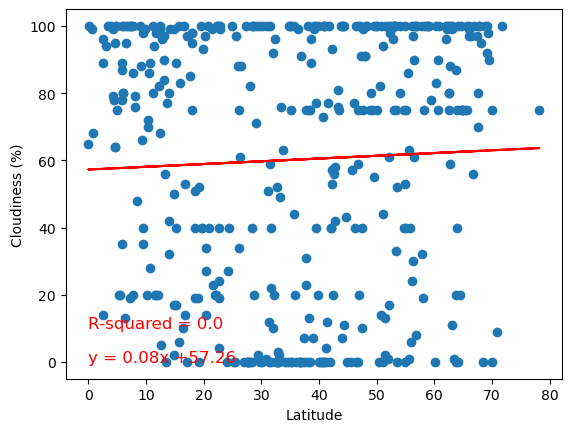

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plots(x_values, y_values, 'Latitude', 'Cloudiness (%)')

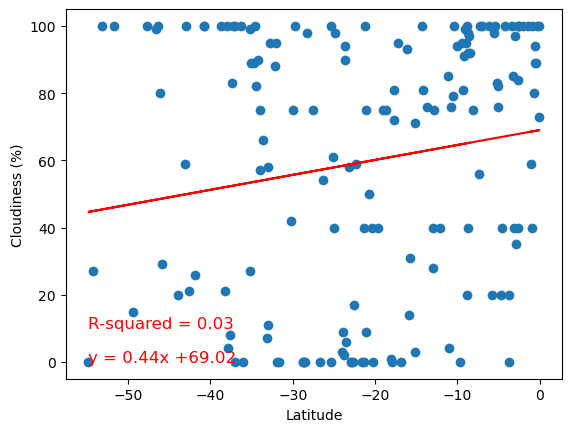

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plots(x_values, y_values, 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** In the northern hemisphere there is essentially no relationship between cloudiness and latitude and the data points appear to be clustered in the extremes on the y-axis (0% and 100% cloudiness). It almost looks like logistical regression would more appropriate than linear regression, but since cloudiness isn't a binary variable that wouldn't be a good method of analysis. As for the southern hemisphere, the data is also clustered but to a lesser extent, and there is a pretty week positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

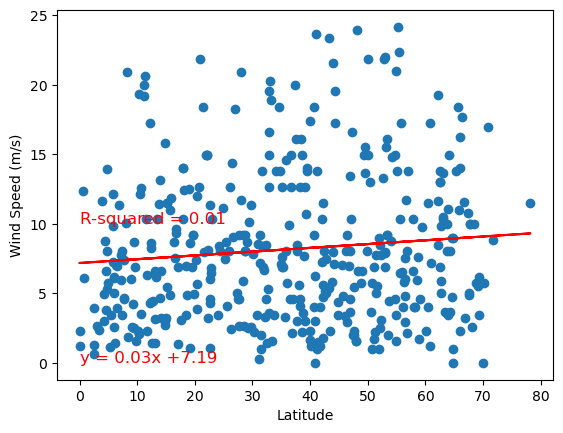

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plots(x_values, y_values, 'Latitude', 'Wind Speed (m/s)')

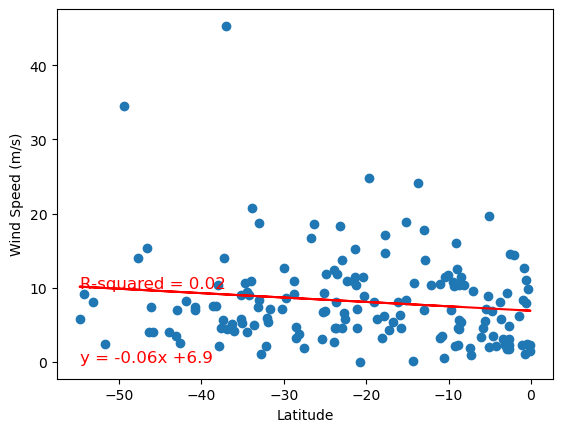

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plots(x_values, y_values, 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** There are very weak (insignificant) relationships between wind speed and latitude in both the northern and southern hemispheres. The data points are much more spread out vertically in the northern hemisphere plot, while they are more clustered together in the southern hemisphere plot. 